In [1]:
from collections import Counter
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
korean_zodiac = {
                    4 : 'Mouse', 5 : 'Cow', 6 : 'Tiger', 7 : 'Rabbit', 8 : 'Dragon', 9 : 'Snake',
                    10 : 'Horse', 11 : 'Sheep' , 0 : 'Monkey', 1 : 'Chicken', 2 : 'Dog', 3 : 'Pig'
                }

zodiac_cnt    = {v : 0 for k, v in korean_zodiac.items()}

In [3]:
df_year = pd.read_csv('../data/birth_yearly.csv', encoding = 'euc-kr').T
df_prov = pd.read_csv('../data/birth_province.csv', encoding = 'euc-kr')

In [4]:
df_year.rename(columns = df_year.iloc[0], inplace = True)
df_year = df_year.loc['1972':].drop(['자연증가건수(명)', '조출생률(천명당)', '자연증가율(천명당)', '합계출산율(명)', '출생성비(명)'], axis = 1)

<AxesSubplot: >

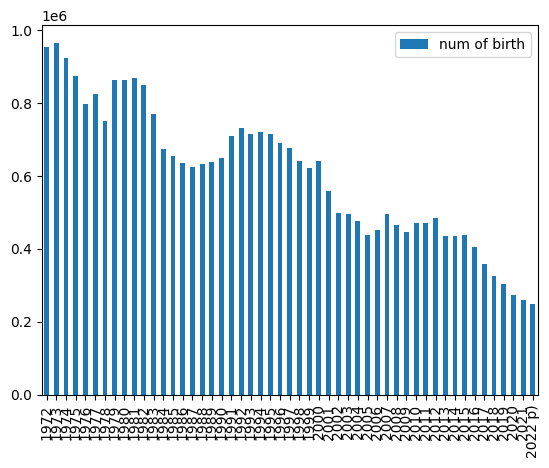

In [5]:
df_year.rename(columns = {'출생아수(명)' : 'num of birth'}, inplace = True)
df_year.plot.bar()

In [6]:
clear_num = lambda x: int(re.sub('[^0-9]', '', x))
zodiac    = [korean_zodiac[clear_num(year) % 12] for year in df_year.index]

In [7]:
df_year['zodiac'] = zodiac

for year in df_year.iterrows():
    
    pop, zod         = year[1]
    zodiac_cnt[zod] += pop

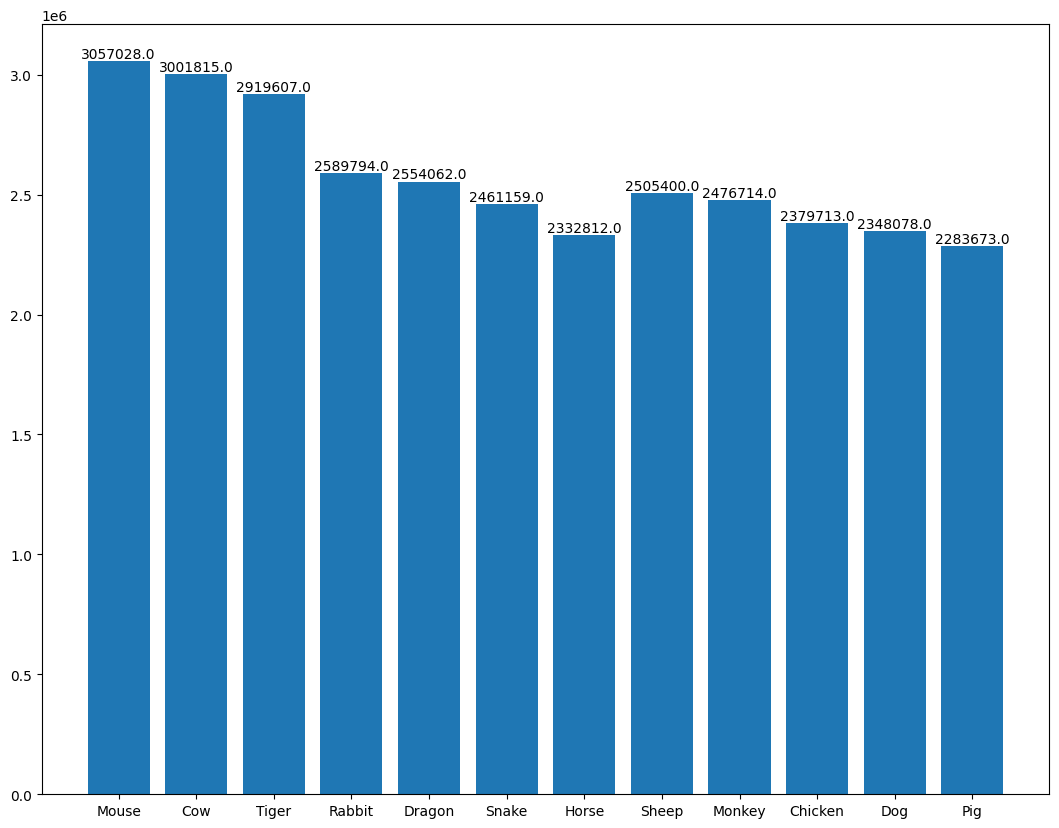

In [8]:
plt.figure(figsize = (13, 10))

plt.bar(zodiac_cnt.keys(), zodiac_cnt.values())

for k, v in zodiac_cnt.items():
    plt.text(
                k, v, v,
                verticalalignment = 'bottom',
                horizontalalignment = 'center'
            )

In [9]:
df_prov.head()

시도별    1991 1991.1  1991.2 1991.3 1991.4    1992 1992.1  1992.2 1992.3  \
0    시도별       계     자택      병원     기타     미상       계     자택      병원     기타   
1     전국  709275  54831  636837  17602      5  730678  36440  679297  14939   
2  서울특별시  180301   9329  168614   2357      1  182691   6140  174511   2039   
3  부산광역시   59793   3026   52427   4340      0   59702   1809   54060   3833   
4  대구광역시   35236   1906   31477   1853      0   36525   1214   33810   1501   

   ...    2020 2020.1  2020.2 2020.3 2020.4    2021 2021.1  2021.2 2021.3  \
0  ...       계     자택      병원     기타     미상       계     자택      병원     기타   
1  ...  272337    453  271272    437    175  260562    112  260100    236   
2  ...   47445     48   47259     73     65   45531     14   45428     34   
3  ...   15058     14   15025     12      7   14446      5   14431      8   
4  ...   11193     16   11167     10      0   10661      8   10644      8   

  2021.4  
0     미상  
1    114  
2     55  
3      2  
4      1  

[5 rows x 156 columns]

In [11]:
years     = [str(idx) for idx in range(1991, 2022)]
provinces = ['TOT', 'WH', 'SU', 'BS', 'DG', 'IC', 'KJ', 'DJ', 'US', 'SJ', 'KG',
             'KW', 'CB', 'CN', 'JB', 'JN', 'KB', 'KN', 'JJ']

df_prov_y = pd.DataFrame(df_prov[years], index = provinces, columns = years)
df_prov_y

1991 1992 1993 1994 1995 1996 1997 1998 1999 2000  ... 2012 2013 2014 2015  \
WH  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
SU  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
BS  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
DG  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
IC  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
KJ  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
DJ  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
US  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
SJ  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
KG  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
KW  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
CB  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
CN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
JB  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
JN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
KB  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
KN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
JJ  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   2016 2017 2018 2019 2020 2021  
WH  NaN  NaN  NaN  NaN  NaN  NaN  
SU  NaN  NaN  NaN  NaN  NaN  NaN  
BS  NaN  NaN  NaN  NaN  NaN  NaN  
DG  NaN  NaN  NaN  NaN  NaN  NaN  
IC  NaN  NaN  NaN  NaN  NaN  NaN  
KJ  NaN  NaN  NaN  NaN  NaN  NaN  
DJ  NaN  NaN  NaN  NaN  NaN  NaN  
US  NaN  NaN  NaN  NaN  NaN  NaN  
SJ  NaN  NaN  NaN  NaN  NaN  NaN  
KG  NaN  NaN  NaN  NaN  NaN  NaN  
KW  NaN  NaN  NaN  NaN  NaN  NaN  
CB  NaN  NaN  NaN  NaN  NaN  NaN  
CN  NaN  NaN  NaN  NaN  NaN  NaN  
JB  NaN  NaN  NaN  NaN  NaN  NaN  
JN  NaN  NaN  NaN  NaN  NaN  NaN  
KB  NaN  NaN  NaN  NaN  NaN  NaN  
KN  NaN  NaN  NaN  NaN  NaN  NaN  
JJ  NaN  NaN  NaN  NaN  NaN  NaN  

[18 rows x 31 columns]

In [12]:
df_prov[years]

1991    1992    1993    1994    1995    1996    1997    1998    1999  \
0        계       계       계       계       계       계       계       계       계   
1   709275  730678  715826  721185  715020  691226  675394  641594  620668   
2   180301  182691  175827  175707  166236  152140  142724  134604  128120   
3    59793   59702   56588   54427   52615   50139   46284   43200   41237   
4    35236   36525   35933   36370   38779   36954   35219   32231   31308   
5    40772   42840   41731   41680   41246   39285   38103   35541   34323   
6    20063   21942   22062   22571   22907   21830   21684   20796   19244   
7    18462   19737   20157   21397   21619   21039   20480   19294   18729   
8        -       -       -       -       -       -   18273   16697   15740   
9        -       -       -       -       -       -       -       -       -   
10  131016  136116  135225  138510  141710  142235  143002  137066  134335   
11   19525   19817   19519   19518   19524   19432   19821   19421   19143   
12   19081   20411   20786   20674   20974   20962   21103   20151   19434   
13   21932   22560   22367   22345   23001   23397   24551   24472   24045   
14   24563   25890   25737   26701   27183   26798   26270   25849   24564   
15   28132   28373   26912   27313   28168   27651   28080   26841   26363   
16   38276   39492   38698   38893   37158   36627   37117   34914   34843   
17   64070   66058   65629   66229   65153   64118   44138   42427   41184   
18    8053    8524    8655    8850    8747    8619    8545    8090    8056   

      2000  ...    2012    2013    2014    2015    2016    2017    2018  \
0        계  ...       계       계       계       계       계       계       계   
1   640089  ...  484550  436455  435435  438420  406243  357771  326822   
2   133154  ...   93914   84066   83711   83005   75536   65389   58074   
3    41222  ...   28673   25831   26190   26645   24906   21480   19152   
4    32477  ...   21472   19340   19361   19438   18298   15946   14400   
5    34433  ...   27781   25560   25786   25491   23609   20445   20087   
6    21148  ...   14392   12729   12729   12441   11580   10120    9105   
7    19570  ...   15279   14099   13962   13774   12436   10851    9337   
8    15816  ...   12160   11330   11556   11732   10910    9381    8149   
9        -  ...    1054    1111    1344    2708    3297    3504    3703   
10  141704  ...  124746  112129  112169  113495  105643   94088   88175   
11   19482  ...   12426   10980   10662   10929   10058    8958    8351   
12   19628  ...   15139   13658   13366   13563   12742   11394   10586   
13   24733  ...   20448   18628   18200   18604   17302   15670   14380   
14   25173  ...   16238   14555   14231   14087   12698   11348   10001   
15   26046  ...   16990   15401   14817   15061   13980   12354   11238   
16   35190  ...   24635   22206   22062   22310   20616   17957   16079   
17   41680  ...   33211   29504   29763   29537   27138   23849   21224   
18    8633  ...    5992    5328    5526    5600    5494    5037    4781   

      2019    2020    2021  
0        계       계       계  
1   302676  272337  260562  
2    53673   47445   45531  
3    17049   15058   14446  
4    13233   11193   10661  
5    18522   16040   14947  
6     8364    7318    7956  
7     8410    7481    7414  
8     7539    6617    6127  
9     3819    3468    3570  
10   83198   77737   76139  
11    8283    7835    7357  
12    9333    8607    8190  
13   13228   11950   10984  
14    8971    8165    7475  
15   10832    9738    8430  
16   14472   12873   12045  
17   19250   16823   15562  
18    4500    3989    3728  

[19 rows x 31 columns]